## Importing necessary packages for data cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

## Reading file

In [2]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


# **Attribute Information**

The attribute information that is stated on <a href="https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set">UCI Repository</a> where indicating each of the column names, the inputs are as follows:<br>

X1 = the transaction date (for example, 2013.250 = 2013 March; 2013.500 = 2013 June, etc.)<br>
X2 = the house age (unit: year)<br>
X3 = the distance to the nearest MRT station (unit: meter)<br>
X4 = the number of convenience stores in the living circle on foot (integer)<br>
X5 = the geographic coordinate, latitude. (unit: degree)<br>
X6 = the geographic coordinate, longitude. (unit: degree)<br>
Y = house price of unit area (10,000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

# **Data Cleaning**

## Weird Transaction Date Format
* The attribute information or description did not clearly explain how the transaction date works or how to count those dates in decimal places, <br>e.g. 2012.916667 = which month of year 2012 ???<br>So here I will extract the years of transaction only.

In [3]:
df["X1 transaction date"] = df["X1 transaction date"].astype(str).str[:4]  # OR.. Use extract method with RegEx >> extract(r"(\d{4})") 
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.drop("No", axis = 1, inplace = True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1


## Raname the column names
* Remove the Xs and Y. 
* The Xs & Y are probably the features and target for use in predicting.

In [5]:
df.rename({c: c[3:] for c in df.columns if c.startswith("X")}, axis = 1, inplace = True)
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,Y house price of unit area
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df.rename(columns = {"Y house price of unit area": "house price of unit area"}, inplace = True)
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1


## Checking any NaN values

In [7]:
df.isna().sum()

transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

## Converting data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    object 
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [9]:
# df["transaction date"] = pd.to_datetime(df["transaction date"]).dt.to_period("Y")
df["transaction date"] = df["transaction date"].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    int64  
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


# **Exploratory Data Analysis (EDA)**

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction date,414.0,2012.695652,0.460687,2012.00000,2012.000000,2013.00000,2013.000000,2013.00000
house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
house price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


## House price / Number of houses

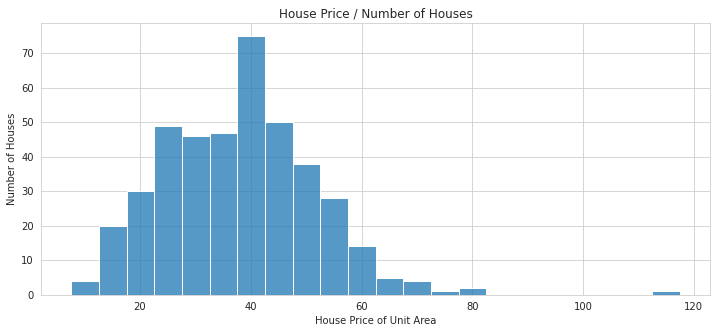

In [12]:
plt.figure(figsize = (12, 5))
ax = sns.histplot(df["house price of unit area"])
plt.title("House Price / Number of Houses")
ax.set(xlabel = "House Price of Unit Area", ylabel = "Number of Houses")  # OR.. use ax.set() to rename
plt.show()

## Number of houses sold in year 2012 and 2013

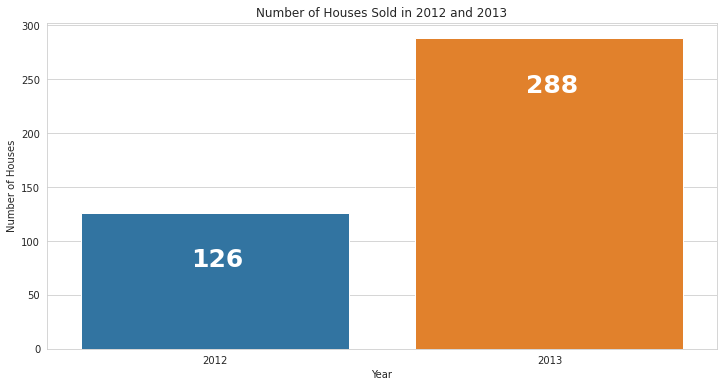

In [13]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(df["transaction date"])
plt.title("Number of Houses Sold in 2012 and 2013")
ax.set(xlabel = "Year", ylabel = "Number of Houses")

for v in ax.patches:
  ax.annotate('{:.0f}'.format(v.get_height()), (v.get_x() +0.33, v.get_height() -50),
                    color = "w", weight = "bold", fontsize = 25)

plt.show()

## Distance to the nearest MRT stations / Number of houses

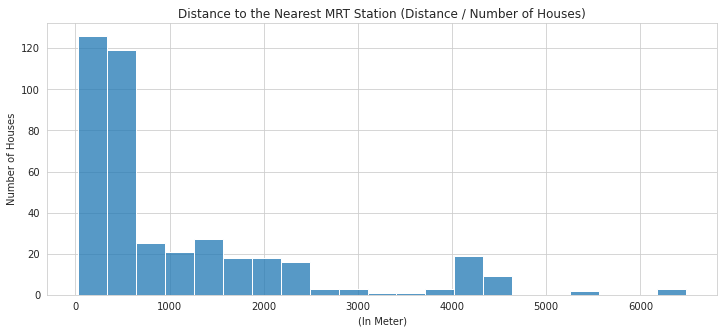

In [14]:
plt.figure(figsize = (12, 5))
ax = sns.histplot(df["distance to the nearest MRT station"])
plt.title("Distance to the Nearest MRT Station (Distance / Number of Houses)")
ax.set(xlabel = "(In Meter)", ylabel = "Number of Houses")
plt.show()

## Nearby convenience stores / Number of houses

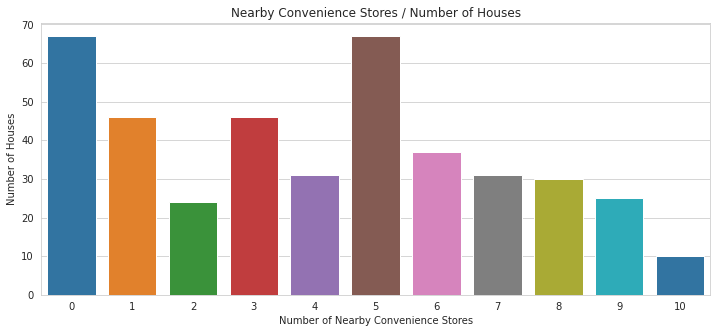

In [15]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(x = "number of convenience stores", data = df, palette = "tab10")
plt.title("Nearby Convenience Stores / Number of Houses")
ax.set(xlabel = "Number of Nearby Convenience Stores", ylabel = "Number of Houses")
plt.show()

## Hosue age / Number of houses

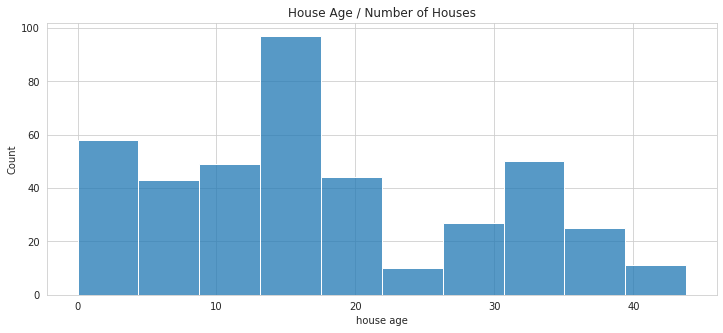

In [16]:
plt.figure(figsize = (12, 5))
sns.histplot(df["house age"])
plt.title("House Age / Number of Houses")
plt.show()

## Finding correlation between variables
* The distance to the nearest MRT station matters the house price

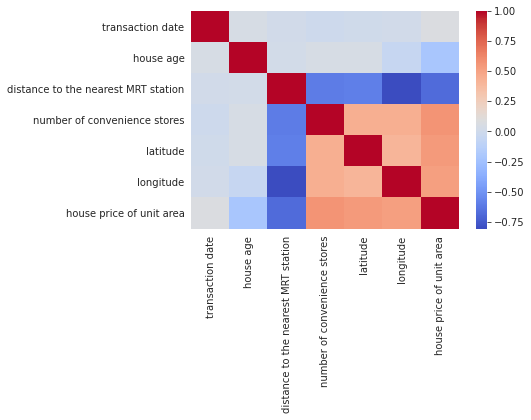

In [17]:
sns.heatmap(df.corr(), cmap = "coolwarm")
plt.show()

## Use Seaborn's pairplot() to visualize pairwise relationships

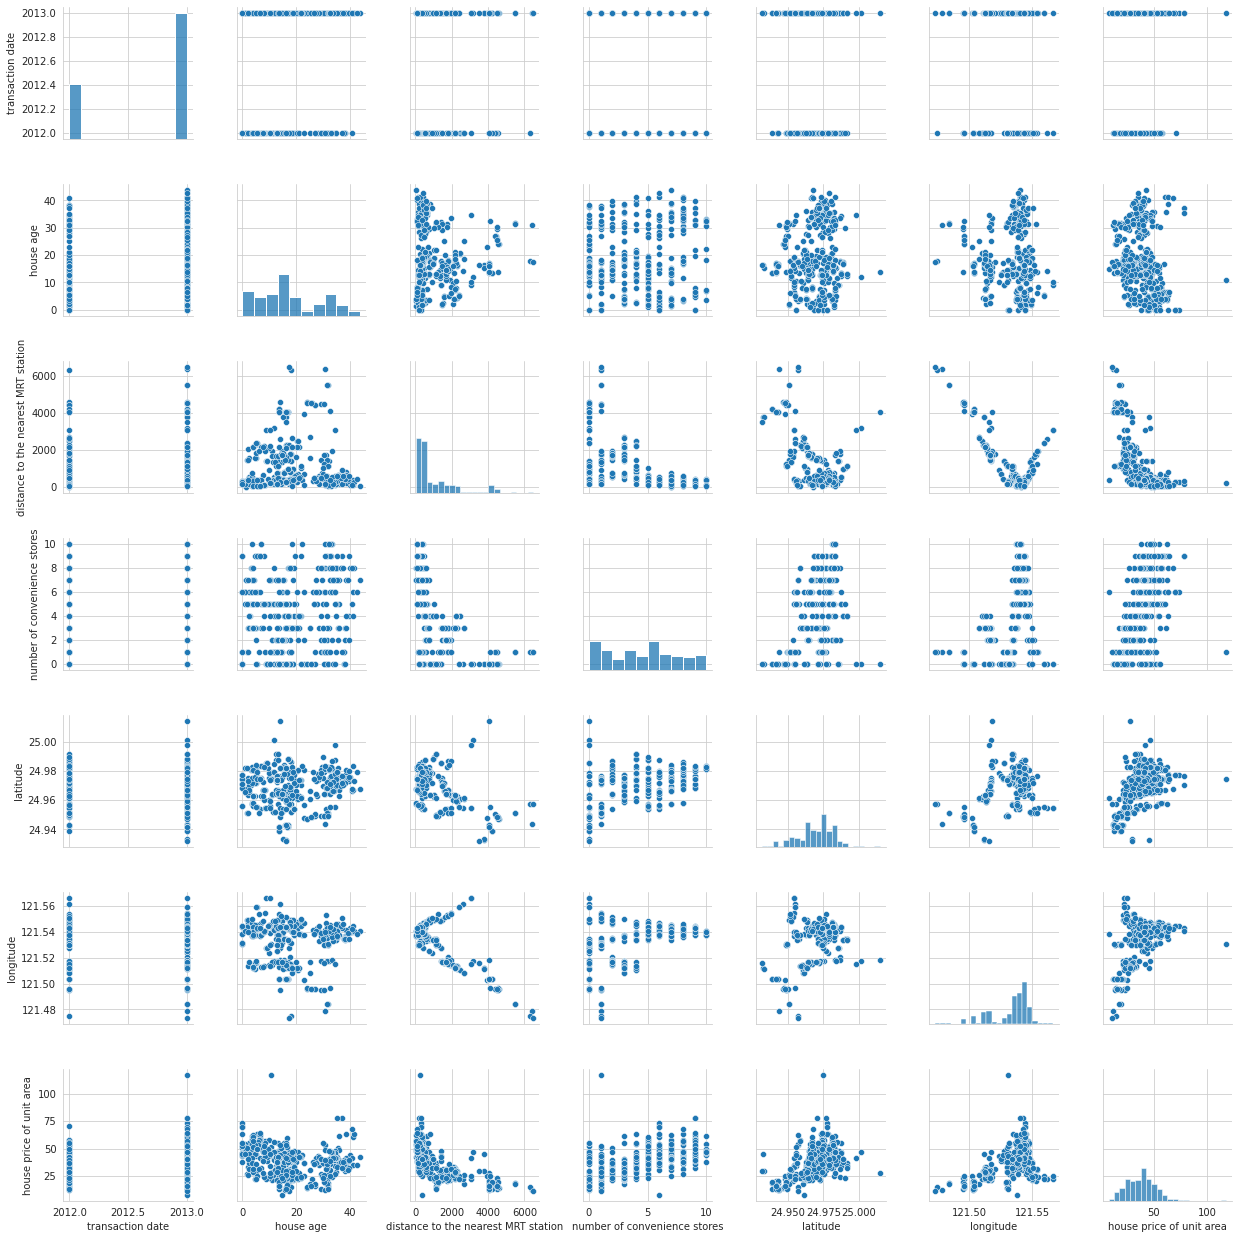

In [18]:
sns.pairplot(df)

## Geographical Properties

In [19]:
!pip3 install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp37-none-any.whl size=28556 sha256=48adeb47472adf724b2db2dc932e48e55cd352e8bd229536c2b1a044b28ba5e7
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


In [20]:
import mplleaflet as mpl

plt.figure(figsize = (10, 8))
plt.scatter(df["longitude"], df["latitude"], marker = "*", c = "r", s = 400, ec = "k")
mpl.display()

## Use the color shades in Scatter Plot to indicates the house price differential
* The locations in the Scatter plot below are exactly same as the map above, the more darker of the marker is, the more expensive the house is.

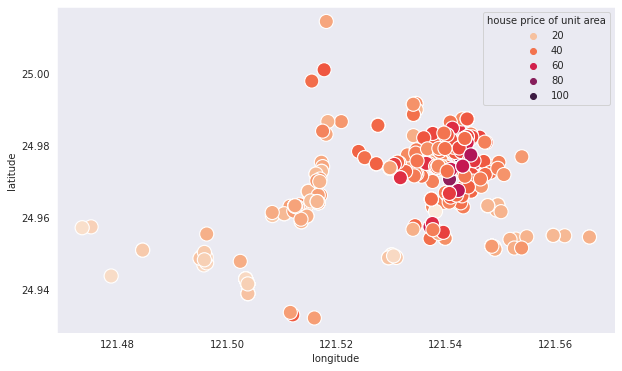

In [21]:
sns.set_style("dark")
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "longitude", y = "latitude", data = df, hue = "house price of unit area", 
                palette = "rocket_r", s = 200)
plt.show()

# Top 10 most expensive houses

In [22]:
df.nlargest(10, "house price of unit area")

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
270,2013,10.8,252.58220,1,24.97460,121.53046,117.5
220,2013,37.2,186.51010,9,24.97703,121.54265,78.3
312,2013,35.4,318.52920,9,24.97071,121.54069,78.0
166,2013,0.0,292.99780,6,24.97744,121.54458,73.6
105,2012,0.0,292.99780,6,24.97744,121.54458,71.0
16,2013,0.0,292.99780,6,24.97744,121.54458,70.1
379,2013,0.0,292.99780,6,24.97744,121.54458,69.7
389,2013,40.9,122.36190,8,24.96756,121.54230,67.7
413,2013,6.5,90.45606,9,24.97433,121.54310,63.9
258,2013,0.0,292.99780,6,24.97744,121.54458,63.3


## Find the 10% of the total row
* It's only has 41, let's make it 50.

In [23]:
len(df) * (0.1)

41.400000000000006

In [24]:
# So I grab the bottom 90% (the rest of the houses) and create a new DF for it

bottom_90_pct = df.nlargest(50, "house price of unit area")
bottom_90_pct.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
270,2013,10.8,252.5822,1,24.97460,121.53046,117.5
220,2013,37.2,186.5101,9,24.97703,121.54265,78.3
312,2013,35.4,318.5292,9,24.97071,121.54069,78.0
166,2013,0.0,292.9978,6,24.97744,121.54458,73.6
105,2012,0.0,292.9978,6,24.97744,121.54458,71.0


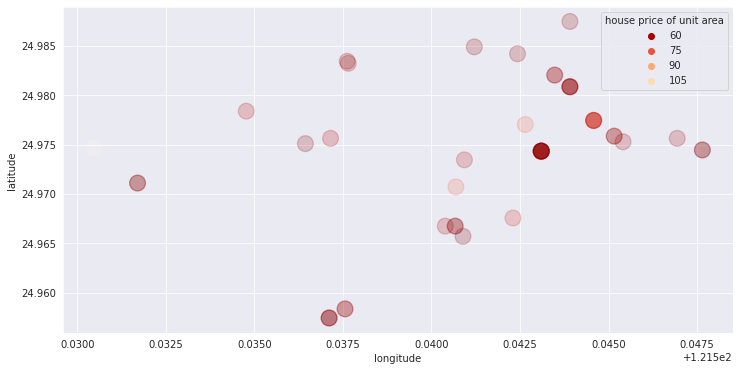

In [84]:
sns.set_style("darkgrid")
plt.figure(figsize = (12, 6))
sns.scatterplot(x = "longitude", y = "latitude", data = bottom_90_pct, hue = "house price of unit area",
               edgecolor = None, alpha = 0.2, palette = "OrRd_r", s = 250)
plt.show()

# **Machine Learning**

## Importing necessary libraries or packages for Machine Learning

In [26]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Preprocessing data for prediction - Normalization
* As we can see our columns in this dataset are all in numeric, so it saved some steps for us and we can straight to normalize the data.

In [27]:
df_normalized = pd.DataFrame(preprocessing.normalize(df))
df_normalized.columns = df.columns
df_normalized

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,0.996907,0.015855,0.042056,0.004955,0.012379,0.060221,0.018779
1,0.986490,0.009561,0.150324,0.004413,0.012248,0.059591,0.020691
2,0.961209,0.006351,0.268348,0.002388,0.011932,0.058037,0.022586
3,0.961125,0.006350,0.268325,0.002387,0.011930,0.058032,0.026165
4,0.979659,0.002435,0.190171,0.002435,0.012163,0.059180,0.020986
...,...,...,...,...,...,...,...
409,0.442115,0.003009,0.896533,0.000000,0.005478,0.026686,0.003382
410,0.996781,0.002774,0.044814,0.004459,0.012373,0.060215,0.024771
411,0.979626,0.009149,0.190265,0.003407,0.012156,0.059147,0.019758
412,0.996413,0.004009,0.051880,0.002475,0.012358,0.060161,0.025987


## Defining features and target
* y - Our test set or target will be the house price;
* X - The rest will be our train set or features

In [28]:
X = df_normalized.iloc[:, :-1]  # OR.. df_normalized.columns != "house price of unit area"
X

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
0,0.996907,0.015855,0.042056,0.004955,0.012379,0.060221
1,0.986490,0.009561,0.150324,0.004413,0.012248,0.059591
2,0.961209,0.006351,0.268348,0.002388,0.011932,0.058037
3,0.961125,0.006350,0.268325,0.002387,0.011930,0.058032
4,0.979659,0.002435,0.190171,0.002435,0.012163,0.059180
...,...,...,...,...,...,...
409,0.442115,0.003009,0.896533,0.000000,0.005478,0.026686
410,0.996781,0.002774,0.044814,0.004459,0.012373,0.060215
411,0.979626,0.009149,0.190265,0.003407,0.012156,0.059147
412,0.996413,0.004009,0.051880,0.002475,0.012358,0.060161


In [29]:
y = df_normalized["house price of unit area"]
y

0      0.018779
1      0.020691
2      0.022586
3      0.026165
4      0.020986
         ...   
409    0.003382
410    0.024771
411    0.019758
412    0.025987
413    0.031635
Name: house price of unit area, Length: 414, dtype: float64

## Splitting the dataset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 88)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train

(310, 6)
(104, 6)
(310,)
(104,)


,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
248,0.892511,0.008424,0.447468,0.000000,0.011068,0.053892
369,0.676737,0.006794,0.734969,0.001009,0.008396,0.040871
116,0.300143,0.004607,0.953702,0.000149,0.003719,0.018113
217,0.981186,0.013655,0.181717,0.002926,0.012181,0.059272
170,0.406122,0.004842,0.913459,0.000000,0.005033,0.024512
...,...,...,...,...,...,...
62,0.678282,0.005798,0.733528,0.001011,0.008415,0.040964
101,0.994417,0.006277,0.084085,0.000494,0.012343,0.060065
404,0.987754,0.008047,0.141968,0.002453,0.012258,0.059640
362,0.899761,0.007643,0.432404,0.001788,0.011169,0.054323


## Evaluating by Linear Regression
* Instantiating the model - Linear Regression to predict as this model is meant for forecasting

In [31]:
lr = LinearRegression()

## Start training

In [32]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Estimating the coefficients for the Linear Regression problem
* coef_: array, shape(n_features,) or (n_targets, n_features)
* intercept: array of shape (n_targets,)

In [33]:
print("Coefficient:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficient: [ 3.60487306e+00 -2.99645589e-01 -2.50000446e-02  3.02405462e-01
  2.80571493e+02 -1.17353534e+02]
Intercept: 0.02858821688604935


## Predicting Test Data

In [34]:
y_pred = lr.predict(X_test)
y_pred

array([0.02580172, 0.01909364, 0.02140818, 0.02161548, 0.01609611,
       0.01494257, 0.02621044, 0.02262197, 0.02113516, 0.02097765,
       0.02798647, 0.02374638, 0.02020429, 0.02631776, 0.00883833,
       0.01154722, 0.02182462, 0.01492878, 0.00429939, 0.02354248,
       0.0148831 , 0.01800257, 0.01895932, 0.02624724, 0.02185761,
       0.02170777, 0.02792714, 0.02170286, 0.01045445, 0.01223557,
       0.02019645, 0.00420376, 0.00882988, 0.01095259, 0.02117988,
       0.02196638, 0.00313643, 0.02088837, 0.00907789, 0.01894459,
       0.02271263, 0.0164495 , 0.02158509, 0.01751663, 0.02107363,
       0.01813672, 0.00356791, 0.00828253, 0.02020589, 0.01835681,
       0.01873278, 0.0206165 , 0.01963185, 0.02064186, 0.02598554,
       0.02105189, 0.01501064, 0.02284347, 0.0224992 , 0.00823763,
       0.01800255, 0.02055205, 0.02059867, 0.01865234, 0.00923426,
       0.02662924, 0.0245331 , 0.00408892, 0.02079799, 0.02624492,
       0.00363774, 0.02182806, 0.01682027, 0.02245637, 0.02495

## Create a scatterplot of the real test values versus the predicted values

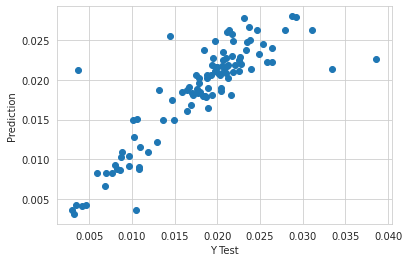

In [35]:
sns.set_style("whitegrid")
plt.scatter(x = y_test, y = y_pred)
plt.xlabel("Y Test")
plt.ylabel("Prediction")
plt.show()

## Evaluating the Linear Regression model
* Loss function - check how close the estimates are to actual values

In [36]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.002220791463925833
MSE: 1.300851415174993e-05
RMSE: 0.0036067317826184316


## Plotting a histogram of the residuals and make sure it looks normally distributed

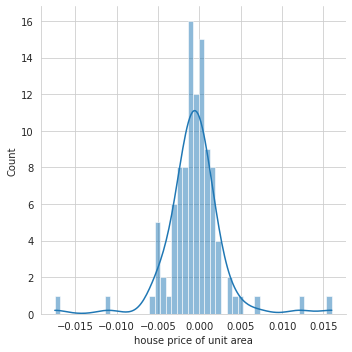

In [37]:
sns.displot(y_test - y_pred, kde = True, bins = 50)

## Interpreting coefficients

In [38]:
coef_df = pd.DataFrame(lr.coef_, X.columns, ["Coefficient"])
coef_df

,Coefficient
transaction date,3.604873
house age,-0.299646
distance to the nearest MRT station,-0.025000
number of convenience stores,0.302405
latitude,280.571493
longitude,-117.353534


---
## Evaluating by TensorFlow

In [39]:
X = df.drop("house price of unit area", axis = 1)
y = df["house price of unit area"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

## Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

## fit and transform for X_train in 1 single step, and then overwrite

In [43]:
X_train= scaler.fit_transform(X_train)

## Only do transform for X_test and not fit because we don't want to assume prior information about our test set, and then overwrite it

In [44]:
X_test = scaler.transform(X_test)

In [45]:
print(X_train.shape)
print(X_test.shape)

(310, 6)
(104, 6)


## Creating a model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [47]:
model = Sequential()

model.add(Dense(6, activation='relu'))  # Check 6 columns in X_train.shape
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse") # Since this is a regression problem, so choose a continuous label such as price

## Training the model

In [48]:
model.fit(x = X_train, y = y_train.values,  # Use .values here as previous steps we have done it in this way
          validation_data = (X_test, y_test.values), 
          batch_size = 128, epochs=400)

Epoch 1/400
3/3 [==============================] - 1s 234ms/step - loss: 1641.0245 - val_loss: 1443.6902
Epoch 2/400
3/3 [==============================] - 0s 21ms/step - loss: 1659.0122 - val_loss: 1441.0037
Epoch 3/400
3/3 [==============================] - 0s 21ms/step - loss: 1627.9908 - val_loss: 1438.1379
Epoch 4/400
3/3 [==============================] - 0s 21ms/step - loss: 1669.8367 - val_loss: 1435.0962
Epoch 5/400
3/3 [==============================] - 0s 22ms/step - loss: 1689.9434 - val_loss: 1431.8970
Epoch 6/400
3/3 [==============================] - 0s 20ms/step - loss: 1653.3108 - val_loss: 1428.5221
Epoch 7/400
3/3 [==============================] - 0s 21ms/step - loss: 1608.7966 - val_loss: 1424.9480
Epoch 8/400
3/3 [==============================] - 0s 22ms/step - loss: 1598.3556 - val_loss: 1421.1633
Epoch 9/400
3/3 [==============================] - 0s 23ms/step - loss: 1597.5359 - val_loss: 1417.1284
Epoch 10/400
3/3 [==============================] - 0s 23ms/ste

In [49]:
losses = pd.DataFrame(model.history.history)

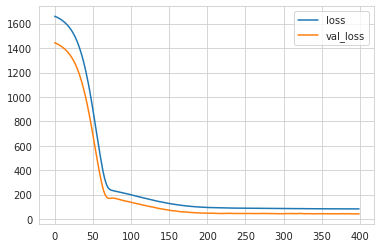

In [50]:
losses.plot()

## Evaluation on Test Data

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [52]:
X_test

array([[ 0.        ,  0.3173516 ,  0.71402282,  0.        ,  0.20116335,
         0.22996073],
       [ 1.        ,  0.39726027,  1.01439502,  0.1       ,  0.30441105,
        -0.01882652],
       [ 0.        ,  0.23515982,  0.47961008,  0.        ,  0.27302472,
         1.05232155],
       [ 1.        ,  0.75799087,  0.01543149,  1.        ,  0.60239942,
         0.75571726],
       [ 1.        ,  0.14155251,  0.3007055 ,  0.1       ,  0.23606398,
         0.90910141],
       [ 1.        ,  0.40182648,  0.27966579,  0.2       ,  0.66226369,
         0.52841303],
       [ 0.        ,  0.74657534,  0.05791132,  0.6       ,  0.38669413,
         0.77777778],
       [ 1.        ,  0.48630137,  0.08071902,  0.4       ,  0.51114881,
         0.72741973],
       [ 1.        ,  0.37442922,  0.04173013,  0.5       ,  0.60542899,
         0.78909679],
       [ 1.        ,  0.77625571,  0.02106143,  0.7       ,  0.41456617,
         0.77154077],
       [ 1.        ,  0.39041096,  0.14812992,  0.

In [53]:
predictions = model.predict(X_test)

In [76]:
print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", np.sqrt(mean_squared_error(y_test,predictions)))
print("EVS:", explained_variance_score(y_test, predictions))  # Return how much variance is explained by the model

MAE: 5.020693723972027
MSE: 6.472903406737058
EVS: 0.6748912544399127


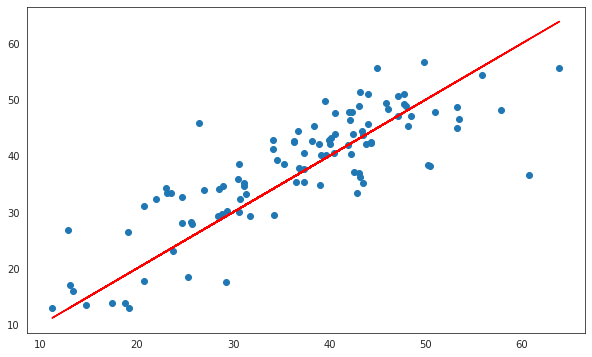

In [78]:
sns.set_style("white")
plt.figure(figsize = (10, 6))
plt.ticklabel_format(style = "plain", axis = "both")
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.show()

In [58]:
errors = y_test.values.reshape(104, 1) - predictions

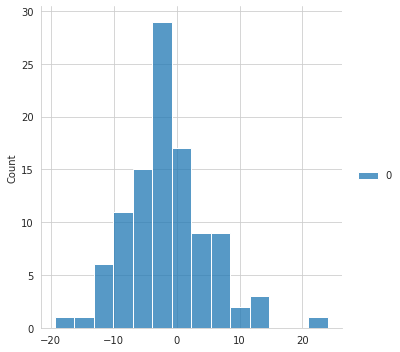

In [59]:
sns.displot(errors)

---
## Predicting on a brand new house #1
* Select the first row of this dataset as prediction

In [60]:
new_house1 = df.drop("house price of unit area", axis = 1).iloc[0]
print(new_house1, "\n")

new_house1.values

transaction date                       2012.00000
house age                                32.00000
distance to the nearest MRT station      84.87882
number of convenience stores             10.00000
latitude                                 24.98298
longitude                               121.54024
Name: 0, dtype: float64 



array([2012.     ,   32.     ,   84.87882,   10.     ,   24.98298,
        121.54024])

## The actual price of "house price of unit area"

In [72]:
df.loc[0, "house price of unit area"]

37.9

## Scaling..

In [62]:
new_house1 = scaler.transform(new_house1.values.reshape(-1, 6))  # -1 to keep the old dimensions along the axis, 6 is for the 6 columns 
new_house1

array([[0.        , 0.73059361, 0.00964961, 1.        , 0.61694135,
        0.75167475]])

## Predicting house price of unit area for house #1
* The model predicted 47.47 but the actual price was 37.9

In [63]:
model.predict(new_house1)

array([[47.474094]], dtype=float32)

---
## Predicting brand new house #2
* This time I use NumPy's RNG to generate the values randomly

In [67]:
from numpy import random

new_house2 = df.drop("house price of unit area", axis = 1).iloc[random.randint(101)]  # Randomize the integers
print(new_house2, "\n")

new_house2.values

transaction date                       2013.00000
house age                                 7.10000
distance to the nearest MRT station     451.24380
number of convenience stores              5.00000
latitude                                 24.97563
longitude                               121.54694
Name: 29, dtype: float64 



array([2013.     ,    7.1    ,  451.2438 ,    5.     ,   24.97563,
        121.54694])

## Scaling..

In [70]:
new_house2 = scaler.transform(new_house2.values.reshape(-1, 6))
new_house2

array([[1.        , 0.16210046, 0.06713756, 0.5       , 0.52787203,
        0.82905983]])

## Predicting house price of unit area for house #2
* The model predicted 49.7 for house price per unit area

In [71]:
model.predict(new_house2)

array([[49.702446]], dtype=float32)